## 1. Supervised, Semi-Supervised, and Unsupervised Learning

(a)

In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import numpy as np

names = ['ID','Class',
          'radius_mean','radius_SE','radius_worst',
         'texture_mean','texture_SE','texture_worst',
         'perimeter_mean','perimeter_SE','perimeter_worst',
         'area_mean','area_SE','area_worst',
         'smooth_mean','smooth_SE','smooth_worst',
         'compact_mean','compact_SE','compact_worst',
         'concavity_mean','concavity_SE','concavity_worst',
         'concave_points_mean','concave_points_SE','concave_points_worst',
         'symmetry_mean','symmetry_SE','symmetry_worst',
        'fractal_dim_mean','fractal_dim_SE','fractal_dim_worst']
df = pd.read_csv(r'../data/wdbc.data', names = names)

print('shape of raw data set:',df.shape)

shape of raw data set: (569, 32)


In [3]:
df.head()

,ID,Class,radius_mean,radius_SE,radius_worst,texture_mean,texture_SE,texture_worst,perimeter_mean,perimeter_SE,...,concavity_worst,concave_points_mean,concave_points_SE,concave_points_worst,symmetry_mean,symmetry_SE,symmetry_worst,fractal_dim_mean,fractal_dim_SE,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


(b) Monte-Carlo Simulation:

In [4]:
from sklearn.preprocessing import Normalizer, LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt

In [5]:
def normalized_random_split(i):
    b_df = df.loc[df['Class'] == 'B'].sample(frac = 0.2, random_state = i)
    m_df = df.loc[df['Class'] == 'M'].sample(frac = 0.2, random_state = i)
    df_test = b_df.append(m_df)
    df_train = df.drop(df_test.index).reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)
    
    X_train = Normalizer().fit_transform(df_train.drop(['ID', 'Class'], axis = 1))
    y_train = LabelBinarizer().fit_transform(df_train['Class'])
    X_test = Normalizer().fit_transform(df_test.drop(['ID', 'Class'], axis = 1))
    y_test = LabelBinarizer().fit_transform(df_test['Class'])
    
    return X_train, y_train, X_test, y_test

In [6]:
train_rep = ['train_accuracy','train_precision','train_recall','train_f1','train_auc']
test_rep = ['test_accuracy','test_precision','test_recall','test_f1','test_auc']

i. Supervised Learning:

In [7]:
from sklearn.svm import LinearSVC

param_grid = {'C':np.logspace(-4,4,9)}
svc_lin = LinearSVC(penalty = 'l1', dual = False)
clf_l1 = GridSearchCV(svc_lin, param_grid, cv = 5, n_jobs = -1)

train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []
    
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []

for i in range(0,30):
    X_train, y_train, X_test, y_test = normalized_random_split(i)
    clf_l1.fit(X_train, y_train)
    y_pred_tr = clf_l1.best_estimator_.predict(X_train)
    y_pred_te = clf_l1.best_estimator_.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, y_pred_tr))
    train_precision.append(precision_score(y_train, y_pred_tr))
    train_recall.append(recall_score(y_train, y_pred_tr))
    train_f1.append(f1_score(y_train, y_pred_tr))
    train_auc.append(roc_auc_score(y_train, y_pred_tr))
    
    test_accuracy.append(accuracy_score(y_test, y_pred_te))
    test_precision.append(precision_score(y_test, y_pred_te))
    test_recall.append(recall_score(y_test, y_pred_te))
    test_f1.append(f1_score(y_test, y_pred_te))
    test_auc.append(roc_auc_score(y_test, y_pred_te))
    
avg_acc_tr = np.mean(train_accuracy)
avg_pre_tr = np.mean(train_precision)
avg_rec_tr = np.mean(train_recall)
avg_f1_tr = np.mean(train_f1)
avg_auc_tr = np.mean(train_auc)
    
avg_acc_te = np.mean(test_accuracy)
avg_pre_te = np.mean(test_precision)
avg_rec_te = np.mean(test_recall)
avg_f1_te = np.mean(test_f1)
avg_auc_te = np.mean(test_auc)
    
report_train_SL = [avg_acc_tr, avg_pre_tr, avg_rec_tr, avg_f1_tr, avg_auc_tr]
report_test_SL = [avg_acc_te, avg_pre_te, avg_rec_te, avg_f1_te, avg_auc_te]

In [8]:
train_SL = pd.DataFrame(report_train_SL, index = train_rep, columns = ['Supervised'])
train_SL

,Supervised
train_accuracy,0.982895
train_precision,0.986236
train_recall,0.967647
train_f1,0.976838
train_auc,0.979803


In [9]:
test_SL = pd.DataFrame(report_test_SL, index = test_rep, columns = ['Supervised'])
test_SL

,Supervised
test_accuracy,0.971681
test_precision,0.968019
test_recall,0.956349
test_f1,0.961551
test_auc,0.968550


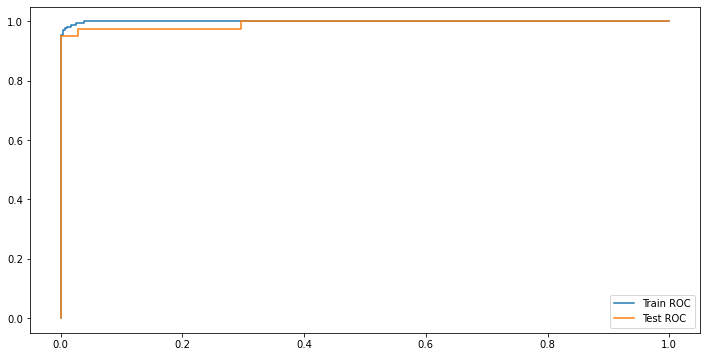

Training Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO             284               2
Actual: YES              5             165 

Test Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO              68               3
Actual: YES              1              41


In [10]:
# plot ROC and report confusion matrix for the last iteration
svc_lin = clf_l1.best_estimator_

train_proba = svc_lin.decision_function(X_train)
test_proba = svc_lin.decision_function(X_test)
train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_proba)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, test_proba)

plt.figure(figsize = (12,6))
plt.plot(train_fpr, train_tpr, label = 'Train ROC')
plt.plot(test_fpr, test_tpr, label = 'Test ROC')
plt.legend()
plt.show()

mat = confusion_matrix(y_train, svc_lin.predict(X_train))
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Training Confusion Matrix:')
print(cm,'\n')
mat = confusion_matrix(y_test, svc_lin.predict(X_test))
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Test Confusion Matrix:')
print(cm)

ii. Semi-Supervised Learning / Self-training:

A.

In [11]:
def normalized_random_split_SSL(i):
    b_df = df.loc[df['Class'] == 'B'].sample(frac = 0.2, random_state = i)
    m_df = df.loc[df['Class'] == 'M'].sample(frac = 0.2, random_state = i)
    df_test = b_df.append(m_df)
    df_train = df.drop(df_test.index).reset_index(drop = True)
    df_test = df_test.reset_index(drop = True)

    b_df_train = df_train.loc[df_train['Class'] == 'B'].sample(frac = 0.5, random_state = i)
    m_df_train = df_train.loc[df_train['Class'] == 'M'].sample(frac = 0.5, random_state = i)
    df_train_labeled = b_df_train.append(m_df_train)
    df_train_unlabeled = df_train.drop(df_train_labeled.index).reset_index(drop = True)
    df_train_labeled = df_train_labeled.reset_index(drop = True)
    
    X_train_lbd = Normalizer().fit_transform(df_train_labeled.drop(['ID', 'Class'], axis = 1))
    y_train_lbd = LabelBinarizer().fit_transform(df_train_labeled['Class'])
    X_train_unlbd = Normalizer().fit_transform(df_train_unlabeled.drop(['ID', 'Class'], axis = 1))
    y_train_unlbd = LabelBinarizer().fit_transform(df_train_unlabeled['Class'])
    X_test = Normalizer().fit_transform(df_test.drop(['ID', 'Class'], axis = 1))
    y_test = LabelBinarizer().fit_transform(df_test['Class'])
    
    return X_train_lbd, y_train_lbd, X_train_unlbd, y_train_unlbd, X_test, y_test 

In [12]:
# split and normalized data
X_train_lbd, y_train_lbd, X_train_unlbd, y_train_unlbd, X_test, y_test  = normalized_random_split_SSL(0)

# train model with labeled data
param_grid = {'C':np.logspace(-4,4,9)}
svc_lin = LinearSVC(penalty = 'l1', dual = False)
clf_l1 = GridSearchCV(svc_lin, param_grid, cv = 5, n_jobs = -1)
clf_l1.fit(X_train_lbd, y_train_lbd)

# get result with the best C from grid search
svc_lin = LinearSVC(C = clf_l1.best_params_['C'], penalty = 'l1', dual = False)
svc_lin.fit(X_train_lbd, y_train_lbd)

LinearSVC(C=10000.0, dual=False, penalty='l1')

B.

In [13]:
# split and normalized data
X_train_lbd, y_train_lbd, X_train_unlbd, y_train_unlbd, X_test, y_test  = normalized_random_split_SSL(0)

# train model with labeled data
param_grid = {'C':np.logspace(-4,4,9)}
svc_lin = LinearSVC(penalty = 'l1', dual = False)
clf_l1 = GridSearchCV(svc_lin, param_grid, cv = 5, n_jobs = -1)
clf_l1.fit(X_train_lbd, y_train_lbd)

# use model to predict labels for unlabeled data and complete training set
svc_lin = LinearSVC(C = clf_l1.best_params_['C'], penalty = 'l1', dual = False)
svc_lin.fit(X_train_lbd, y_train_lbd)

while len(X_train_unlbd) > 0:
    train_proba_unlbd = svc_lin.decision_function(X_train_unlbd)
    proba_abs = np.abs(train_proba_unlbd)
    index = proba_abs.argmax()
    X_train = np.vstack([X_train_lbd, X_train_unlbd[index]])
    y_train = np.append(y_train_lbd, int(train_proba_unlbd[index] > 0))
    X_train_unlbd = np.delete(X_train_unlbd, index, axis = 0)
    svc_lin.fit(X_train_lbd, y_train_lbd)

# run SSL for M = 30 times
param_grid = {'C':np.logspace(-4,4,9)}
svc_lin = LinearSVC(penalty = 'l1', dual = False)
clf_l1 = GridSearchCV(svc_lin, param_grid, cv = 5, n_jobs = -1)

train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []
    
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []

for i in range(0,30):
    clf_l1.fit(X_train, y_train)
    y_pred_tr = clf_l1.best_estimator_.predict(X_train)
    y_pred_te = clf_l1.best_estimator_.predict(X_test)
    
    train_accuracy.append(accuracy_score(y_train, y_pred_tr))
    train_precision.append(precision_score(y_train, y_pred_tr))
    train_recall.append(recall_score(y_train, y_pred_tr))
    train_f1.append(f1_score(y_train, y_pred_tr))
    train_auc.append(roc_auc_score(y_train, y_pred_tr))
    
    test_accuracy.append(accuracy_score(y_test, y_pred_te))
    test_precision.append(precision_score(y_test, y_pred_te))
    test_recall.append(recall_score(y_test, y_pred_te))
    test_f1.append(f1_score(y_test, y_pred_te))
    test_auc.append(roc_auc_score(y_test, y_pred_te))
    
avg_acc_tr = np.mean(train_accuracy)
avg_pre_tr = np.mean(train_precision)
avg_rec_tr = np.mean(train_recall)
avg_f1_tr = np.mean(train_f1)
avg_auc_tr = np.mean(train_auc)
    
avg_acc_te = np.mean(test_accuracy)
avg_pre_te = np.mean(test_precision)
avg_rec_te = np.mean(test_recall)
avg_f1_te = np.mean(test_f1)
avg_auc_te = np.mean(test_auc)
    
report_train_SSL = [avg_acc_tr, avg_pre_tr, avg_rec_tr, avg_f1_tr, avg_auc_tr]
report_test_SSL = [avg_acc_te, avg_pre_te, avg_rec_te, avg_f1_te, avg_auc_te]

In [14]:
train_SSL = pd.DataFrame(report_train_SSL, index = train_rep, columns = ['SemiSupervised'])
train_SSL

,SemiSupervised
train_accuracy,0.977729
train_precision,0.979481
train_recall,0.960853
train_f1,0.970063
train_auc,0.974366


In [15]:
test_SSL = pd.DataFrame(report_test_SSL, index = test_rep, columns = ['SemiSupervised'])
test_SSL


,SemiSupervised
test_accuracy,0.974041
test_precision,0.934747
test_recall,1.000000
test_f1,0.966266
test_auc,0.979343


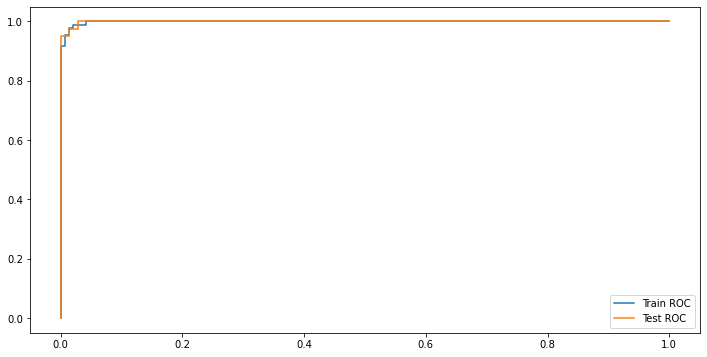

Training Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO             141               2
Actual: YES              4              82 

Test Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO              68               3
Actual: YES              0              42


In [16]:
# plot ROC and report confusion matrix for the last iteration
svc_lin = clf_l1.best_estimator_

train_proba = svc_lin.decision_function(X_train)
test_proba = svc_lin.decision_function(X_test)
train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_proba)
test_fpr, test_tpr, test_threshold = roc_curve(y_test, test_proba)

plt.figure(figsize = (12,6))
plt.plot(train_fpr, train_tpr, label = 'Train ROC')
plt.plot(test_fpr, test_tpr, label = 'Test ROC')
plt.legend()
plt.show()

mat = confusion_matrix(y_train, svc_lin.predict(X_train))
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Training Confusion Matrix:')
print(cm,'\n')
mat = confusion_matrix(y_test, svc_lin.predict(X_test))
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Test Confusion Matrix:')
print(cm)

iii. Unsupervised Learning:

A.

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# run k-means for n_nit = 10 times with random initial centroids to avoid being trapped in a local min
X_train, y_train, X_test, y_test = normalized_random_split(0)
kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 10).fit(X_train)

B.

In [18]:
# run USL for M = 30 times
kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 10)

train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []

for i in range(0,30):
    X_train, y_train, X_test, y_test = normalized_random_split(i)
    kmeans.fit(X_train)
    centers = kmeans.cluster_centers_
    dist = distance.cdist(X_train, centers, 'euclidean')
    
    # majority polling
    poll_index_0 = np.argpartition(dist[:,0], 30)[:30]
    poll_index_1 = np.argpartition(dist[:,1], 30)[:30]
    cluster_0 = [i for i in range(len(kmeans.predict(X_train))) if kmeans.predict(X_train)[i] == 0]
    cluster_1 = [i for i in range(len(kmeans.predict(X_train))) if kmeans.predict(X_train)[i] == 1]
    y_pred_tr = y_train.copy()
    y_pred_tr[poll_index_0] = np.argmax(np.bincount(y_train[poll_index_0].flatten()))
    y_pred_tr[poll_index_1] = np.argmax(np.bincount(y_train[poll_index_1].flatten()))
    
    train_accuracy.append(accuracy_score(y_train, y_pred_tr))
    train_precision.append(precision_score(y_train, y_pred_tr))
    train_recall.append(recall_score(y_train, y_pred_tr))
    train_f1.append(f1_score(y_train, y_pred_tr))
    train_auc.append(roc_auc_score(y_train, y_pred_tr))
    
avg_acc_tr = np.mean(train_accuracy)
avg_pre_tr = np.mean(train_precision)
avg_rec_tr = np.mean(train_recall)
avg_f1_tr = np.mean(train_f1)
avg_auc_tr = np.mean(train_auc)
    
report_train_USL = [avg_acc_tr, avg_pre_tr, avg_rec_tr, avg_f1_tr, avg_auc_tr]

In [19]:
train_USL = pd.DataFrame(report_train_USL, index = train_rep, columns = ['Unsupervised KMeans'])
train_USL

,Unsupervised KMeans
train_accuracy,0.996564
train_precision,0.995692
train_recall,0.995098
train_f1,0.995391
train_auc,0.996267


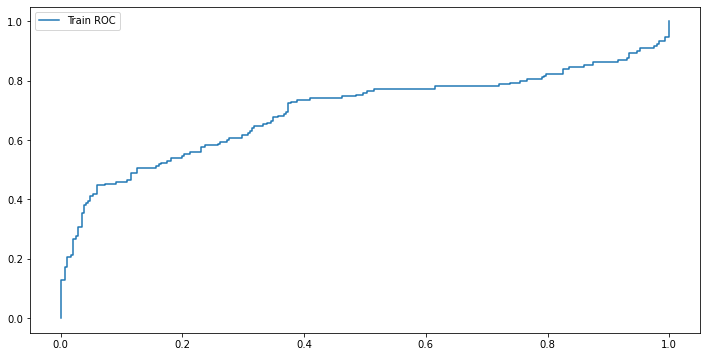

Training Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO             285               1
Actual: YES              1             169


In [20]:
# plot ROC and report confusion matrix for the last iteration
import math

train_proba = list()
for i in range(len(y_pred_tr)):
    train_proba.append(math.exp(dist[i,y_pred_tr[i]])/math.exp(sum(dist[i])))
train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_proba)

plt.figure(figsize = (12,6))
plt.plot(train_fpr, train_tpr, label = 'Train ROC')
plt.legend()
plt.show()

mat = confusion_matrix(y_train, y_pred_tr)
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Training Confusion Matrix:')
print(cm)

C.

In [21]:
# run USL for M = 30 times
kmeans = KMeans(n_clusters = 2, init = 'random', n_init = 10)
test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []

for i in range(0,30):
    y_pred_te = list()
    X_train, y_train, X_test, y_test = normalized_random_split(i)
    kmeans.fit(X_test)
    centers = kmeans.cluster_centers_
    dist = distance.cdist(X_test, centers, 'euclidean')
    for y in range(len(X_test)):
        if dist[i,0]<dist[i,1]:
            y_pred_te.append(0)
        else:
            y_pred_te.append(1)

    test_accuracy.append(accuracy_score(y_test, y_pred_te))
    test_precision.append(precision_score(y_test, y_pred_te))
    test_recall.append(recall_score(y_test, y_pred_te))
    test_f1.append(f1_score(y_test, y_pred_te))
    test_auc.append(roc_auc_score(y_test, y_pred_te))
    
avg_acc_te = np.mean(test_accuracy)
avg_pre_te = np.mean(test_precision)
avg_rec_te = np.mean(test_recall)
avg_f1_te = np.mean(test_f1)
avg_auc_te = np.mean(test_auc)

report_test_USL = [avg_acc_te, avg_pre_te, avg_rec_te, avg_f1_te, avg_auc_te]

In [22]:
test_USL = pd.DataFrame(report_test_USL, index = test_rep, columns = ['Unsupervised KMeans'])
test_USL

,Unsupervised KMeans
test_accuracy,0.500000
test_precision,0.185841
test_recall,0.500000
test_f1,0.270968
test_auc,0.500000


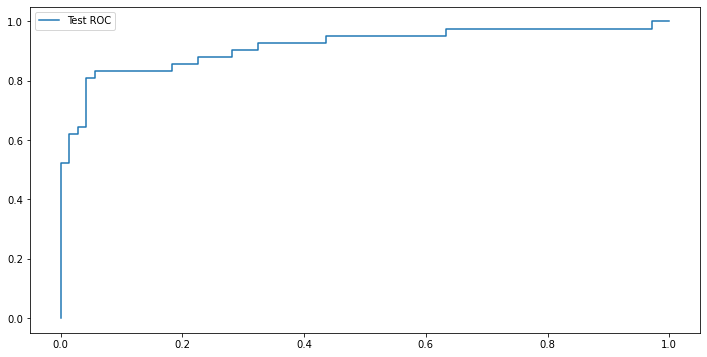

Test Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO               0              71
Actual: YES              0              42


In [23]:
# plot ROC and report confusion matrix for the last iteration
test_proba = list()
for i in range(len(y_pred_te)):
    test_proba.append(math.exp(dist[i,y_pred_te[i]])/math.exp(sum(dist[i])))
test_fpr, test_tpr, test_threshold = roc_curve(y_test, test_proba)

plt.figure(figsize = (12,6))
plt.plot(test_fpr, test_tpr, label = 'Test ROC')
plt.legend()
plt.show()

mat = confusion_matrix(y_test, y_pred_te)
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Test Confusion Matrix:')
print(cm)

iv. Spectral Clustering:

In [24]:
from sklearn.cluster import SpectralClustering

# run SC for M = 30 times
spec = SpectralClustering(n_clusters = 2, gamma = 1)

train_accuracy = []
train_precision = []
train_recall = []
train_f1 = []
train_auc = []
tr_pred_all = np.empty((0,456), int)

for i in range(0,30):
    X_train, y_train, X_test, y_test = normalized_random_split(i)
    spec.fit(X_train)
    labels = spec.labels_
    
    # majority polling
    cluster_0 = [i for i in range(len(labels)) if labels[i] == 0]
    cluster_1 = [i for i in range(len(labels)) if labels[i] == 1]
    y_pred_tr = y_train.copy()
    y_pred_tr[cluster_0] = np.argmax(np.bincount(y_train[cluster_0].flatten()))
    y_pred_tr[cluster_1] = np.argmax(np.bincount(y_train[cluster_1].flatten()))
    
    train_accuracy.append(accuracy_score(y_train, y_pred_tr))
    train_precision.append(precision_score(y_train, y_pred_tr))
    train_recall.append(recall_score(y_train, y_pred_tr))
    train_f1.append(f1_score(y_train, y_pred_tr))
    train_auc.append(roc_auc_score(y_train, y_pred_tr))
    
    tr_pred_all = np.vstack((tr_pred_all, y_pred_tr.flatten()))
    
avg_acc_tr = np.mean(train_accuracy)
avg_pre_tr = np.mean(train_precision)
avg_rec_tr = np.mean(train_recall)
avg_f1_tr = np.mean(train_f1)
avg_auc_tr = np.mean(train_auc)
    
report_train_SC = [avg_acc_tr, avg_pre_tr, avg_rec_tr, avg_f1_tr, avg_auc_tr]

In [25]:
train_SC = pd.DataFrame(report_train_SC, index = train_rep, columns = ['Unsupervised Spectral'])
train_SC

,Unsupervised Spectral
train_accuracy,0.881287
train_precision,0.958751
train_recall,0.712353
train_f1,0.817215
train_auc,0.847027


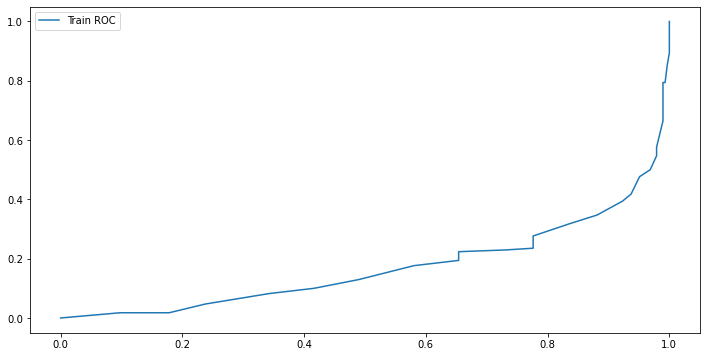

Training Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO             282               4
Actual: YES             51             119


In [26]:
# plot ROC and report confusion matrix for the last iteration
proba_0 = [np.bincount(tr_pred_all[:,i])[0]/30 for i in range(456)]
train_proba = list()
for i in range(len(y_pred_tr)):
    if y_pred_tr[i] == 0:
        train_proba.append(proba_0[i])
    else:
        train_proba.append(1-proba_0[i])
train_fpr, train_tpr, train_threshold = roc_curve(y_train, train_proba)

plt.figure(figsize = (12,6))
plt.plot(train_fpr, train_tpr, label = 'Train ROC')
plt.legend()
plt.show()

mat = confusion_matrix(y_train, y_pred_tr)
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Training Confusion Matrix:')
print(cm)

In [27]:
# run SC for M = 30 times
spec = SpectralClustering(n_clusters = 2, gamma = 1)

test_accuracy = []
test_precision = []
test_recall = []
test_f1 = []
test_auc = []
te_pred_all = np.empty((0,113), int)

for i in range(0,30):
    y_pred_te = list()
    X_train, y_train, X_test, y_test = normalized_random_split(i)
    y_pred_te = spec.fit_predict(X_test)

    test_accuracy.append(accuracy_score(y_test, y_pred_te))
    test_precision.append(precision_score(y_test, y_pred_te))
    test_recall.append(recall_score(y_test, y_pred_te))
    test_f1.append(f1_score(y_test, y_pred_te))
    test_auc.append(roc_auc_score(y_test, y_pred_te))
    
    te_pred_all = np.vstack((te_pred_all, y_pred_te.flatten()))
    
avg_acc_te = np.mean(test_accuracy)
avg_pre_te = np.mean(test_precision)
avg_rec_te = np.mean(test_recall)
avg_f1_te = np.mean(test_f1)
avg_auc_te = np.mean(test_auc)

report_test_SC = [avg_acc_te, avg_pre_te, avg_rec_te, avg_f1_te, avg_auc_te]

In [28]:
test_SC = pd.DataFrame(report_test_SC, index = train_rep, columns = ['Unsupervised Spectral'])
test_SC

,Unsupervised Spectral
train_accuracy,0.608260
train_precision,0.657817
train_recall,0.576190
train_f1,0.599460
train_auc,0.601710


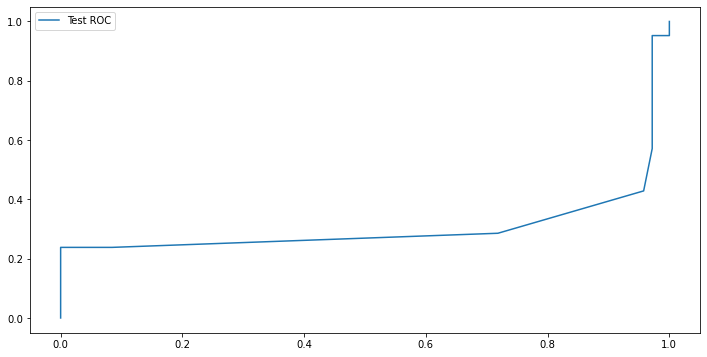

Test Confusion Matrix:
             Predicted: NO  Predicted: YES
Actual: NO              69               2
Actual: YES             10              32


In [29]:
# plot ROC and report confusion matrix for the last iteration
proba_0 = [np.bincount(te_pred_all[:,i])[0]/30 for i in range(113)]
test_proba = list()
for i in range(len(y_pred_te)):
    if y_pred_te[i] == 0:
        test_proba.append(proba_0[i])
    else:
        test_proba.append(1-proba_0[i])
test_fpr, test_tpr, test_threshold = roc_curve(y_test, test_proba)

plt.figure(figsize = (12,6))
plt.plot(test_fpr, test_tpr, label = 'Test ROC')
plt.legend()
plt.show()

mat = confusion_matrix(y_test, y_pred_te)
cm = pd.DataFrame(mat, index = ['Actual: NO', 'Actual: YES'], columns = ['Predicted: NO', 'Predicted: YES'])
print('Test Confusion Matrix:')
print(cm)

v. Comparison

In [30]:
table_tr = pd.DataFrame({'Supervised': report_train_SL, 'Semi Supervised': report_train_SSL,
                         'Unsupervised KMeans': report_train_USL, 'Unsupervised Spectral': report_train_SC},
                        index = train_rep)
table_tr

,Supervised,Semi Supervised,Unsupervised KMeans,Unsupervised Spectral
train_accuracy,0.982895,0.977729,0.996564,0.881287
train_precision,0.986236,0.979481,0.995692,0.958751
train_recall,0.967647,0.960853,0.995098,0.712353
train_f1,0.976838,0.970063,0.995391,0.817215
train_auc,0.979803,0.974366,0.996267,0.847027


In [31]:
table_te = pd.DataFrame({'Supervised': report_test_SL, 'Semi Supervised': report_test_SSL,
                         'Unsupervised KMeans': report_test_USL, 'Unsupervised Spectral': report_test_SC},
                        index = test_rep)
table_te

,Supervised,Semi Supervised,Unsupervised KMeans,Unsupervised Spectral
test_accuracy,0.971681,0.974041,0.500000,0.608260
test_precision,0.968019,0.934747,0.185841,0.657817
test_recall,0.956349,1.000000,0.500000,0.576190
test_f1,0.961551,0.966266,0.270968,0.599460
test_auc,0.968550,0.979343,0.500000,0.601710


## 2. Active Learning Using Support Vector Machines

(a)

In [32]:
df = pd.read_csv(r'../data/data_banknote_authentication.txt',
                 names = ['variance','skewness','curtosis','entropy','class'])
df.shape

(1372, 5)

In [33]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [34]:
from sklearn.model_selection import train_test_split

y = df['class']
X = df.drop(['class'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 472/1372, random_state = 0)

(b)

i. Passive Learning:

In [35]:
def random_10(X, y):
    X.reset_index(drop = True)
    y.reset_index(drop = True)
    
    idx = np.random.choice(len(X), 10, replace = False)
    
    X_pool = X.iloc[idx].reset_index(drop = True)
    y_pool = y.iloc[idx].reset_index(drop = True)
    
    X_remain = X.drop(X.index[idx]).reset_index(drop = True)
    y_remain = y.drop(y.index[idx]).reset_index(drop = True)
        
    return X_pool, y_pool, X_remain, y_remain

In [37]:
# initial pool of 10 random selected data points

param_grid = {'C':np.logspace(-4,4,9)}
svc_lin = LinearSVC(penalty = 'l1', dual = False)
clf_l1 = GridSearchCV(svc_lin, param_grid, cv = 5, n_jobs = -1)

errors_pas = list()

for k in range(50):    
    error_list = list()
    X_pool, y_pool, X_remain, y_remain = random_10(X_train, y_train)

    for i in range(90):
        clf_l1.fit(X_pool, y_pool)
        best_C = clf_l1.best_params_['C']
        
        svc = LinearSVC(C = best_C, penalty = 'l1', dual = False)
        svc.fit(X_pool, y_pool)
        error_list.append(1 - svc.score(X_test, y_test))
        
        if i != 89:
            X_pool_new, y_pool_new, X_remain_new, y_remain_new = random_10(X_remain, y_remain)
            X_pool = X_pool.append(X_pool_new).reset_index(drop = True)
            y_pool = y_pool.append(y_pool_new).reset_index(drop = True)
            X_remain = X_remain_new
            y_remain = y_remain_new
            
    errors_pas.append(error_list)

In [38]:
passive = pd.DataFrame(errors_pas)
passive

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.139831,0.108051,0.101695,0.029661,0.031780,0.042373,0.040254,0.012712,0.019068,0.021186,...,0.019068,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
1,0.131356,0.036017,0.055085,0.046610,0.046610,0.023305,0.046610,0.016949,0.012712,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
2,0.131356,0.033898,0.042373,0.042373,0.038136,0.023305,0.014831,0.012712,0.019068,0.019068,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
3,0.040254,0.031780,0.033898,0.016949,0.016949,0.016949,0.016949,0.016949,0.019068,0.019068,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
4,0.125000,0.031780,0.038136,0.033898,0.027542,0.027542,0.027542,0.021186,0.025424,0.021186,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
5,0.069915,0.065678,0.063559,0.055085,0.059322,0.036017,0.036017,0.036017,0.038136,0.027542,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
6,0.216102,0.184322,0.036017,0.048729,0.038136,0.016949,0.016949,0.016949,0.012712,0.014831,...,0.019068,0.019068,0.012712,0.012712,0.019068,0.012712,0.012712,0.012712,0.012712,0.012712
7,0.127119,0.108051,0.036017,0.061441,0.042373,0.038136,0.036017,0.038136,0.014831,0.014831,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
8,0.040254,0.021186,0.029661,0.023305,0.025424,0.016949,0.016949,0.014831,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
9,0.031780,0.021186,0.031780,0.016949,0.016949,0.025424,0.012712,0.014831,0.012712,0.014831,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712


ii. Active Learning:

In [39]:
param_grid = {'C':np.logspace(-4,4,9)}
svc_lin = LinearSVC(penalty = 'l1', dual = False)
clf_l1 = GridSearchCV(svc_lin, param_grid, cv = 5, n_jobs = -1)

errors_act = list()

for k in range(50):    
    error_list = list()
    X_pool, y_pool, X_remain, y_remain = random_10(X_train, y_train)

    for i in range(90):
        clf_l1.fit(X_pool, y_pool)
        best_C = clf_l1.best_params_['C']
        
        svc = LinearSVC(C = best_C, penalty = 'l1', dual = False)
        svc.fit(X_pool, y_pool)
        error_list.append(1 - svc.score(X_test, y_test))
        
        if i != 89:
            dist = svc.decision_function(X_remain)
            index = np.argsort(np.abs(dist))[:10]
            X_pool_new = X_remain.iloc[index, :]
            y_pool_new = y_remain.iloc[index]
            X_remain_new = X_remain.drop(X_remain.index[index])
            y_remain_new = y_remain.drop(y_remain.index[index])
            
            X_pool = X_pool.append(X_pool_new).reset_index(drop = True)
            y_pool = y_pool.append(y_pool_new).reset_index(drop = True)
            X_remain = X_remain_new.reset_index(drop = True)
            y_remain = y_remain_new.reset_index(drop = True)

    
    errors_act.append(error_list) 

In [40]:
active = pd.DataFrame(errors_act)
active

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.444915,0.112288,0.029661,0.010593,0.006356,0.010593,0.012712,0.012712,0.012712,0.012712,...,0.016949,0.016949,0.016949,0.016949,0.012712,0.012712,0.012712,0.012712,0.019068,0.012712
1,0.372881,0.105932,0.093220,0.016949,0.052966,0.031780,0.019068,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
2,0.177966,0.029661,0.012712,0.012712,0.012712,0.012712,0.027542,0.012712,0.012712,0.012712,...,0.016949,0.016949,0.016949,0.016949,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
3,0.118644,0.021186,0.044492,0.031780,0.012712,0.019068,0.012712,0.019068,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
4,0.141949,0.016949,0.137712,0.014831,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
5,0.156780,0.019068,0.021186,0.019068,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.019068,0.012712,0.012712
6,0.044492,0.021186,0.019068,0.010593,0.010593,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.012712,0.012712,0.012712
7,0.080508,0.025424,0.031780,0.023305,0.021186,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.019068,0.012712,0.012712,0.012712,0.012712,0.012712
8,0.065678,0.233051,0.055085,0.012712,0.012712,0.019068,0.019068,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.019068,0.019068,0.012712
9,0.044492,0.023305,0.021186,0.012712,0.012712,0.019068,0.012712,0.012712,0.019068,0.012712,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.012712,0.012712


(c)

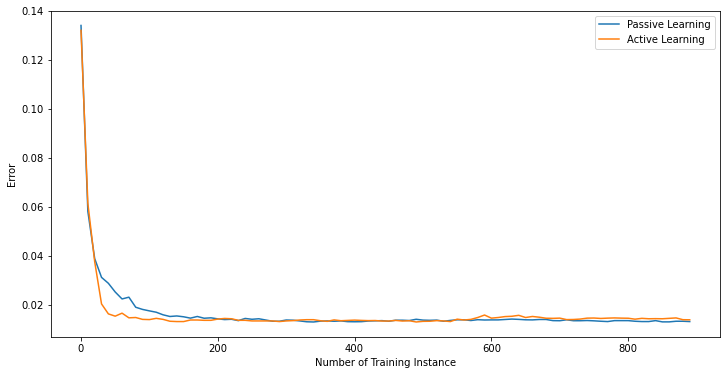

In [41]:
plt.figure(figsize = (12,6))
plt.plot(np.arange(0,90)*10, passive.mean(), label = 'Passive Learning')
plt.plot(np.arange(0,90)*10, active.mean(), label = 'Active Learning')
plt.xlabel('Number of Training Instance')
plt.ylabel('Error')
plt.legend()

as is shown in the learning curve, active learning has advantage over passive learning when the training data size is relatively small. however, this advantage will deminish as the training set grows larger.